# Import libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import log_loss
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import GridSearchCV,KFold,LeaveOneOut
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import umap

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Define functions

In [61]:
def ConvertLabels(labels):
    #labels = np.asarray(labels)
    #for label in range(len(labels))
     #   print(label)
    column_name = 'label'
    labels.loc[colon_label[column_name] > 0] = 1
    labels.loc[colon_label[column_name] < 0] = 0
    
    return labels

# Read data

In [62]:
colon       = pd.read_csv('colonCancerData.csv', index_col=0)
colon_label = pd.read_csv('label.csv')
colon_label = ConvertLabels(colon_label).squeeze(1)
data_label  = pd.concat([colon, colon_label], axis = 1, sort= False)

In [63]:
print('colon.shape:', colon.shape)
print('colon_label.shape', colon_label.shape)
print('data_label.shape', data_label.shape)

colon.shape: (62, 2000)
colon_label.shape (62,)
data_label.shape (62, 2001)


# Split data

In [72]:
X_train, X_test, y_train, y_test = train_test_split(colon, colon_label, test_size=0.2, random_state=1234)

In [73]:
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (49, 2000)
X_test.shape: (13, 2000)
y_train.shape: (49,)
y_test.shape: (13,)


# Preprocess data

In [74]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Create data clustering

## Hierarchical clustering

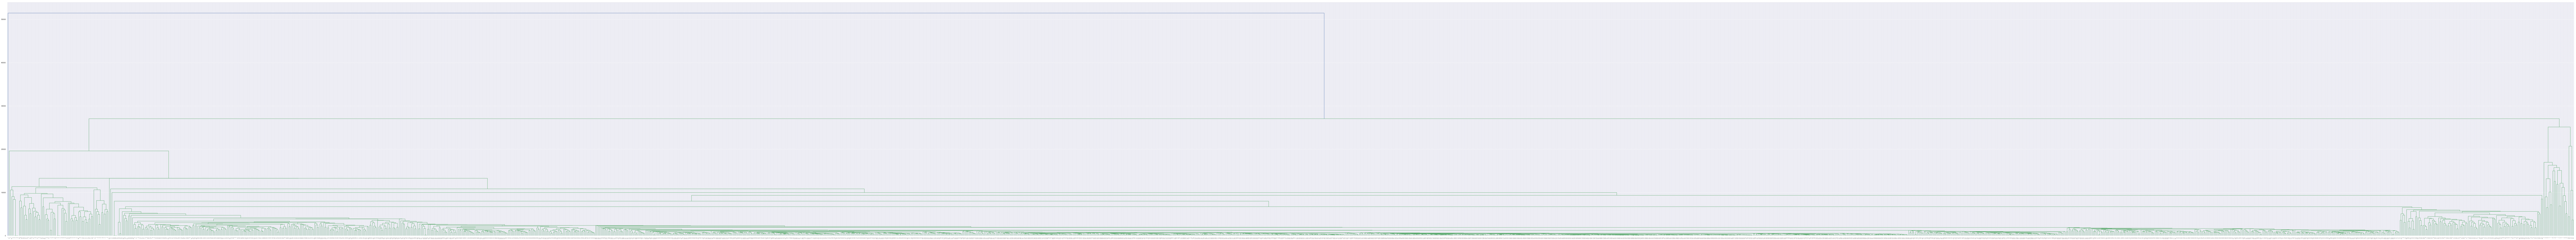

In [97]:
linked    = linkage(X_train.T, 'average')
labelList = range(1, 2001)
plt.figure(figsize=(300, 28))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()
#plt.savefig('GeneHierarchicalClustering.png')

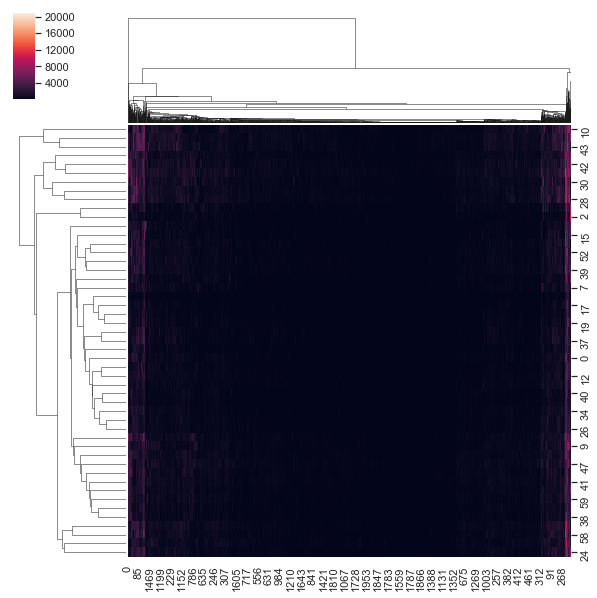

In [83]:
sns.set(color_codes=True)
sns.clustermap(X_train)

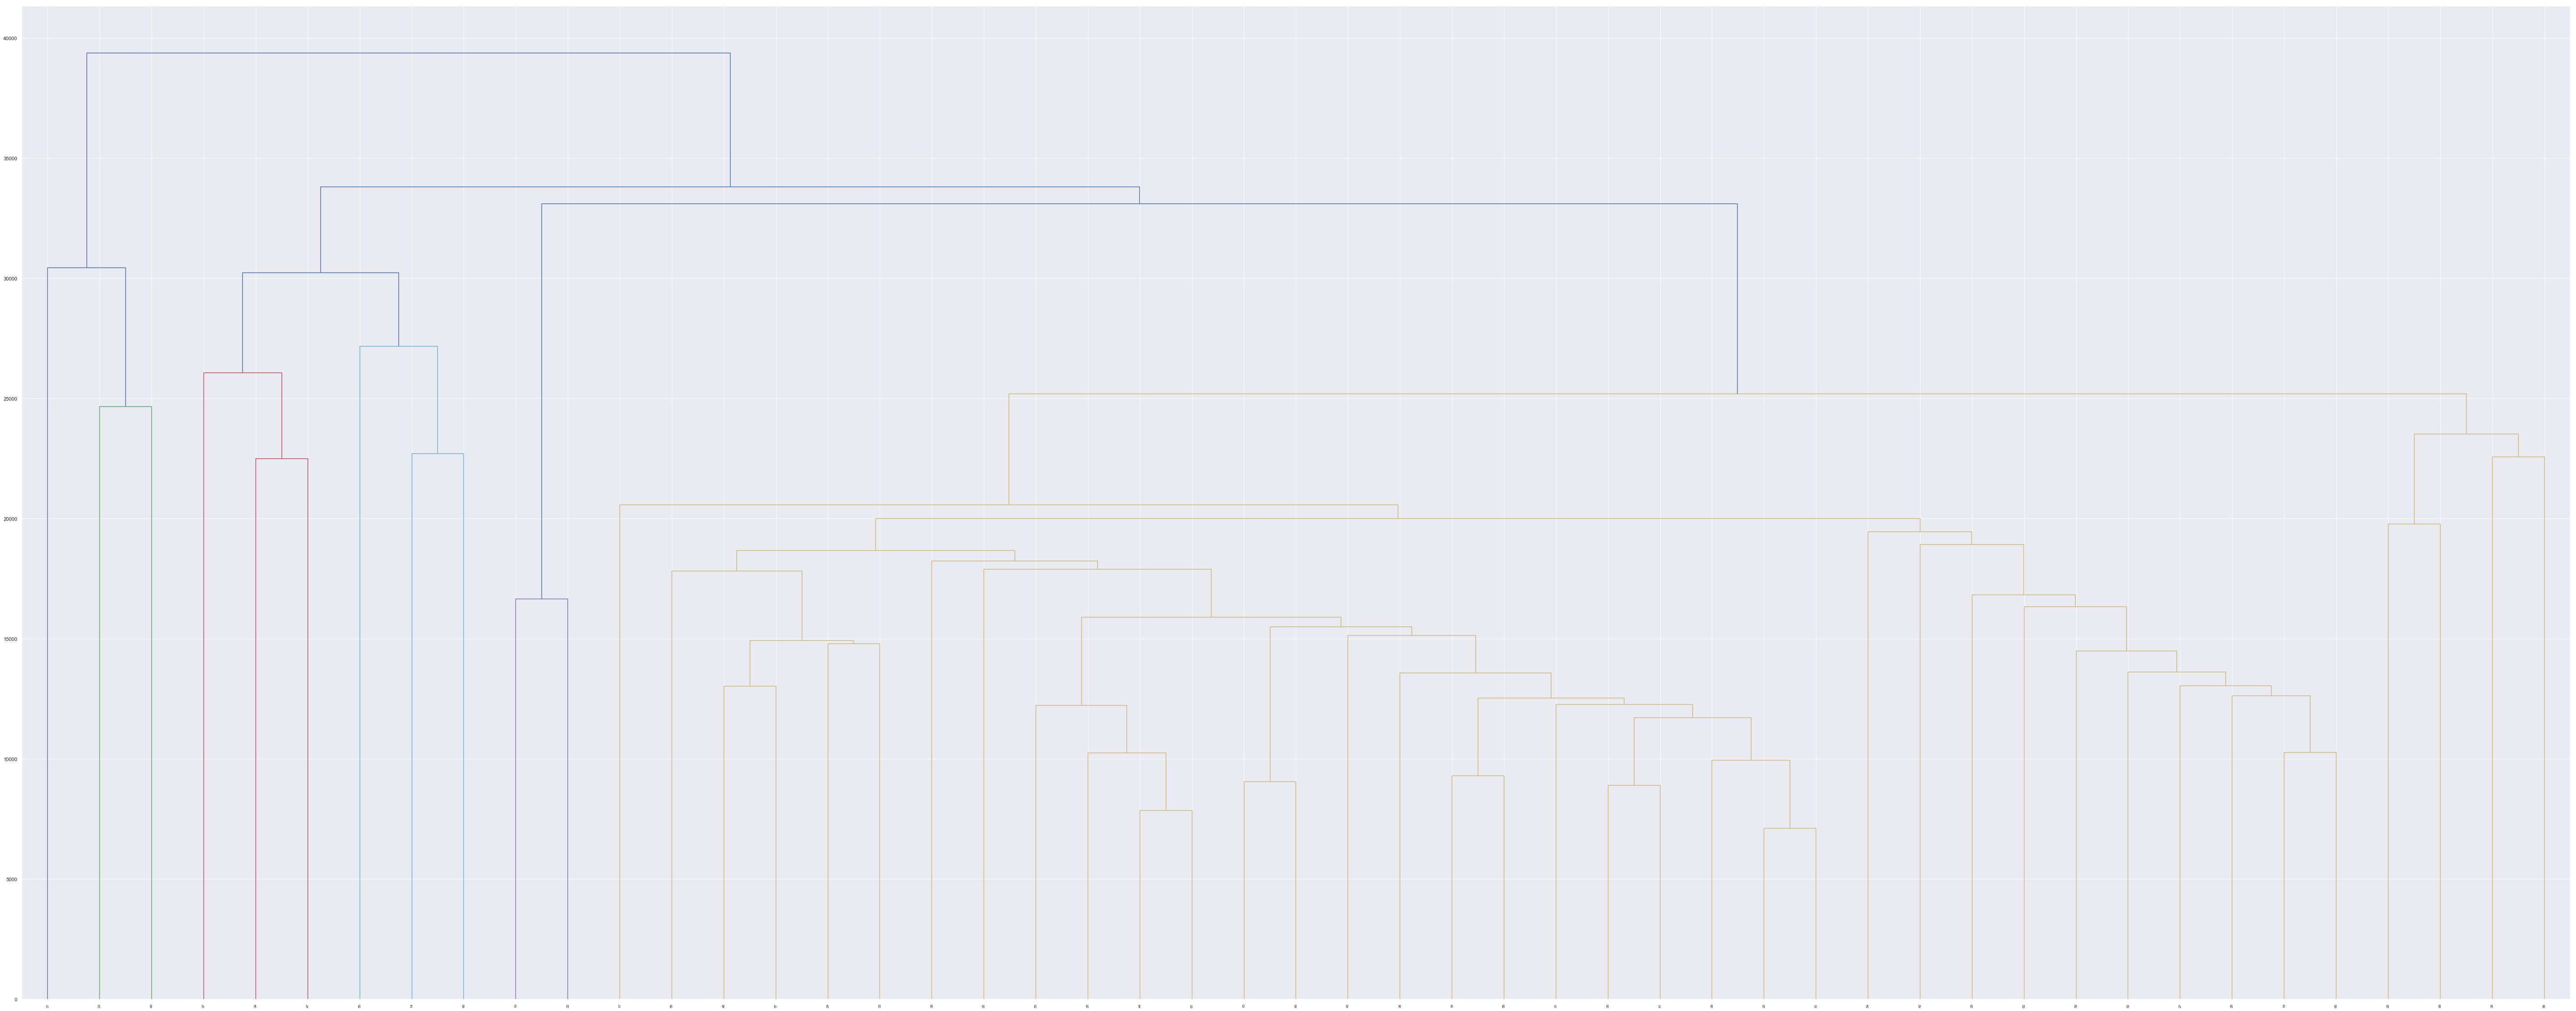

In [99]:
linked    = linkage(X_train, 'average')
labelList = range(1, 63)
plt.figure(figsize=(100, 40))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()
# plt.savefig('PatientHierarchicalClustering.png')